# Exploratory Data Analysis - Radar data and weather data

## 1. Loading packages and libraries

In [2]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualisations
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# For UML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_bikelane = pd.read_csv('/workspaces/2nd_semester_project/notebooks/df_bikelane_weather.csv') # The path to the dataset should probably be changed when we're setting up the serverless-ml-pipeline
df_building = pd.read_csv('/workspaces/2nd_semester_project/notebooks/df_building_weather.csv')

In [4]:
df_bikelane.head()

,time,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,...,f_cnt,dr,snr,rssi,hw_fw_version,time_hour,temperature_2m,precipitation,psensor,id
0,2024-03-01 00:00:32.251,3.04,5.25,-253.0,-27.0,-630.0,6.0,6.0,6.0,6.0,...,1459.0,4.0,2.5,-86.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BIKELANE,2024-03-01 00:00:32.251_BIKELANE
1,2024-03-01 00:10:32.251,3.04,5.25,-254.0,-20.0,-627.0,6.0,6.0,6.0,6.0,...,1459.0,4.0,2.5,-86.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BIKELANE,2024-03-01 00:10:32.251_BIKELANE
2,2024-03-01 00:20:33.352,3.04,5.25,-254.0,-23.0,-635.0,5.0,5.0,5.0,5.0,...,1460.0,4.0,NaN,-91.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BIKELANE,2024-03-01 00:20:33.352_BIKELANE
3,2024-03-01 00:30:34.352,3.04,5.25,-256.0,-25.0,-628.0,5.0,5.0,5.0,5.0,...,1460.0,4.0,NaN,-91.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BIKELANE,2024-03-01 00:30:34.352_BIKELANE
4,2024-03-01 00:40:33.352,3.04,5.25,-253.0,-28.0,-630.0,5.0,5.0,5.0,5.0,...,1460.0,4.0,NaN,-91.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BIKELANE,2024-03-01 00:40:33.352_BIKELANE


In [5]:
df_building.head()

,time,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,...,f_cnt,dr,snr,rssi,hw_fw_version,time_hour,temperature_2m,precipitation,psensor,id
0,2024-03-01 00:03:31.999,3.16,5.500,312.0,-465.0,-991.0,4.0,5.0,6.0,6.0,...,1510.0,5.0,1.8,-89.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BUILDING,2024-03-01 00:03:31.999_BUILDING
1,2024-03-01 00:13:30.999,3.16,5.500,309.0,-463.0,-992.0,4.0,5.0,6.0,6.0,...,1510.0,5.0,1.8,-89.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BUILDING,2024-03-01 00:13:30.999_BUILDING
2,2024-03-01 00:23:31.999,3.16,5.375,312.0,-466.0,-987.0,4.0,5.0,6.0,6.0,...,1510.0,5.0,1.8,-89.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BUILDING,2024-03-01 00:23:31.999_BUILDING
3,2024-03-01 00:33:33.017,3.16,5.375,312.0,-464.0,-997.0,6.0,5.0,5.0,5.0,...,1511.0,5.0,1.2,-89.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BUILDING,2024-03-01 00:33:33.017_BUILDING
4,2024-03-01 00:43:33.017,3.16,5.375,310.0,-467.0,-993.0,6.0,5.0,5.0,5.0,...,1511.0,5.0,1.2,-89.0,DataVersion.HW_2FW2_X_X,2024-03-01 00:00:00,6.4805,0.9,BUILDING,2024-03-01 00:43:33.017_BUILDING


In [7]:
# Changing the time and time_hour columns to datetime
df_bikelane['time'] = pd.to_datetime(df_bikelane['time'])
df_bikelane['time_hour'] = pd.to_datetime(df_bikelane['time_hour'])
df_building['time'] = pd.to_datetime(df_building['time'])
df_building['time_hour'] = pd.to_datetime(df_building['time_hour'])

In [8]:
print(df_bikelane.info())
print(df_building.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7047 entries, 0 to 7046
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            7047 non-null   datetime64[ns]
 1   battery         7046 non-null   float64       
 2   temperature     7047 non-null   float64       
 3   x               7047 non-null   float64       
 4   y               7047 non-null   float64       
 5   z               7047 non-null   float64       
 6   radar_0         7046 non-null   float64       
 7   radar_1         7046 non-null   float64       
 8   radar_2         7046 non-null   float64       
 9   radar_3         7046 non-null   float64       
 10  radar_4         7046 non-null   float64       
 11  radar_5         7046 non-null   float64       
 12  radar_6         7046 non-null   float64       
 13  radar_7         7046 non-null   float64       
 14  package_type    7047 non-null   object        
 15  f_cn

In [10]:
df_building.nunique()

time              7155
battery              4
temperature        296
x                  653
y                  524
z                  892
radar_0            110
radar_1            112
radar_2             84
radar_3             85
radar_4             79
radar_5             48
radar_6             44
radar_7             42
package_type         2
f_cnt             2508
dr                   1
snr                 80
rssi                29
hw_fw_version        1
time_hour         1303
temperature_2m     326
precipitation       27
psensor              1
id                7155
dtype: int64

In [11]:
# Making a new column including only the date from the 'time' variable
df_building['date'] = df_building['time'].dt.date
df_bikelane['date'] = df_bikelane['time'].dt.date
# Making a new column including only the hour from the 'time' variable
df_building['hour'] = df_building['time'].dt.hour
df_bikelane['hour'] = df_bikelane['time'].dt.hour
# Making a new column including the day of week from the 'time' variable
df_building['day_of_week'] = df_building['time'].dt.dayofweek
df_bikelane['day_of_week'] = df_bikelane['time'].dt.dayofweek
# And another column containing the name of the day
df_building['day_name'] = df_building['time'].dt.day_name()
df_bikelane['day_name'] = df_bikelane['time'].dt.day_name()

In [12]:
# Checking how these new variables look
df_building[['time','date', 'hour', 'day_of_week', 'day_name']].sample(10)

,time,date,hour,day_of_week,day_name
108,2024-03-01 20:39:21.141,2024-03-01,20,4,Friday
5622,2024-04-18 13:58:09.201,2024-04-18,13,3,Thursday
5694,2024-04-19 01:42:58.578,2024-04-19,1,4,Friday
6829,2024-04-27 15:01:42.904,2024-04-27,15,5,Saturday
1011,2024-03-09 17:34:26.866,2024-03-09,17,5,Saturday
6872,2024-04-27 22:11:33.313,2024-04-27,22,5,Saturday
1327,2024-03-12 01:27:29.984,2024-03-12,1,1,Tuesday
1637,2024-03-15 21:01:59.932,2024-03-15,21,4,Friday
5767,2024-04-19 15:53:18.525,2024-04-19,15,4,Friday
6104,2024-04-22 01:32:21.928,2024-04-22,1,0,Monday


In [13]:
df_bikelane[['time','date', 'hour', 'day_of_week', 'day_name']].sample(10)

,time,date,hour,day_of_week,day_name
5389,2024-04-17 16:27:21.266,2024-04-17,16,2,Wednesday
1515,2024-03-12 18:16:27.243,2024-03-12,18,1,Tuesday
3621,2024-04-02 01:39:39.224,2024-04-02,1,1,Tuesday
4414,2024-04-08 17:34:54.976,2024-04-08,17,0,Monday
3097,2024-03-27 11:59:25.809,2024-03-27,11,2,Wednesday
5408,2024-04-17 19:37:19.115,2024-04-17,19,2,Wednesday
5176,2024-04-16 00:51:51.377,2024-04-16,0,1,Tuesday
6026,2024-04-22 13:39:25.049,2024-04-22,13,0,Monday
4774,2024-04-11 21:47:32.142,2024-04-11,21,3,Thursday
4131,2024-04-06 16:35:48.927,2024-04-06,16,5,Saturday


## 5. Exploratory Data Analysis

Now we'll start on the EDA. Firstly, we'll look at the descriptive statistics for all of the numeric columns. For this we'll use the pandas describe command.

In [14]:
df_building.describe()

,time,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,...,radar_7,f_cnt,dr,snr,rssi,time_hour,temperature_2m,precipitation,hour,day_of_week
count,7155,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,7155.000000,...,7155.000000,7155.000000,7155.0,7108.000000,7155.000000,7155,7155.000000,7155.000000,7155.000000,7155.000000
mean,2024-03-31 16:13:38.837857792,3.167212,8.119427,299.372746,-413.790217,-853.986024,13.067505,13.497275,11.829210,10.849336,...,6.620685,3085.131377,5.0,3.515166,-83.822502,2024-03-31 15:43:28.805031424,5.853533,0.098658,11.860517,3.072397
min,2024-03-01 00:03:31.999000,3.140000,-1.750000,-232.000000,-1112.000000,-1648.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,1510.000000,5.0,-9.500000,-98.000000,2024-03-01 00:00:00,-3.369500,0.000000,0.000000,0.000000
25%,2024-03-16 22:16:41.380000,3.160000,4.875000,263.000000,-474.000000,-988.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,2328.000000,5.0,0.800000,-87.000000,2024-03-16 22:00:00,3.180500,0.000000,5.000000,1.000000
50%,2024-03-30 23:08:01.255000064,3.160000,7.000000,308.000000,-467.000000,-904.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,3041.000000,5.0,4.800000,-84.000000,2024-03-30 23:00:00,5.630500,0.000000,12.000000,3.000000
75%,2024-04-16 16:14:27.799000064,3.180000,9.875000,348.000000,-459.000000,-797.000000,8.000000,6.000000,6.000000,6.000000,...,6.000000,3901.500000,5.0,7.000000,-80.000000,2024-04-16 16:00:00,8.130500,0.000000,18.000000,5.000000
max,2024-04-29 23:58:31.717000,3.200000,38.750000,909.000000,435.000000,226.000000,160.000000,170.000000,143.000000,110.000000,...,51.000000,4596.000000,5.0,10.800000,-70.000000,2024-04-29 23:00:00,18.030499,4.600000,23.000000,6.000000
std,NaN,0.010825,5.650455,108.402764,200.540056,231.751742,19.388897,21.412991,16.388257,14.528098,...,4.539248,902.610305,0.0,4.571675,5.052625,NaN,3.780457,0.348339,7.189017,2.034044


In [15]:
df_bikelane.describe()

,time,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,...,radar_7,f_cnt,dr,snr,rssi,time_hour,temperature_2m,precipitation,hour,day_of_week
count,7047,7046.000000,7047.000000,7047.000000,7047.000000,7047.000000,7046.000000,7046.000000,7046.000000,7046.000000,...,7046.000000,7047.000000,7047.000000,6944.000000,7047.000000,7047,7047.000000,7047.000000,7047.000000,7047.000000
mean,2024-03-31 11:57:51.588065536,3.057988,6.867710,-213.281396,0.457216,-595.645949,15.850270,14.446778,14.719131,12.782856,...,6.473034,3003.147581,4.719881,1.834807,-86.542075,2024-03-31 11:28:17.062579968,5.842853,0.098624,11.692777,3.058465
min,2024-03-01 00:00:32.251000,3.040000,-2.250000,-547.000000,-1007.000000,-1475.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,1459.000000,1.000000,-15.200000,-98.000000,2024-03-01 00:00:00,-3.369500,0.000000,0.000000,0.000000
25%,2024-03-16 00:39:33.854000128,3.060000,3.875000,-257.000000,-27.000000,-683.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,2220.000000,5.000000,-1.500000,-90.000000,2024-03-16 00:00:00,3.130500,0.000000,5.000000,1.000000
50%,2024-04-01 07:19:35.713999872,3.060000,6.000000,-212.000000,-20.000000,-604.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,3037.000000,5.000000,3.200000,-86.000000,2024-04-01 07:00:00,5.630500,0.000000,12.000000,3.000000
75%,2024-04-16 19:15:58.208000,3.060000,9.000000,-169.000000,-8.000000,-510.000000,7.000000,7.000000,6.000000,7.000000,...,6.000000,3832.000000,5.000000,5.800000,-84.000000,2024-04-16 19:00:00,8.180500,0.000000,18.000000,5.000000
max,2024-04-29 23:50:04.407000,3.080000,30.500000,288.000000,786.000000,16.000000,173.000000,182.000000,236.000000,151.000000,...,40.000000,4504.000000,5.000000,10.500000,-76.000000,2024-04-29 23:00:00,18.030499,4.600000,23.000000,6.000000
std,NaN,0.011555,4.645321,83.668190,135.036219,168.422165,26.763144,23.096458,24.891353,20.397260,...,3.299577,911.587358,0.757688,4.714740,3.589441,NaN,3.770319,0.349014,7.168503,2.025312


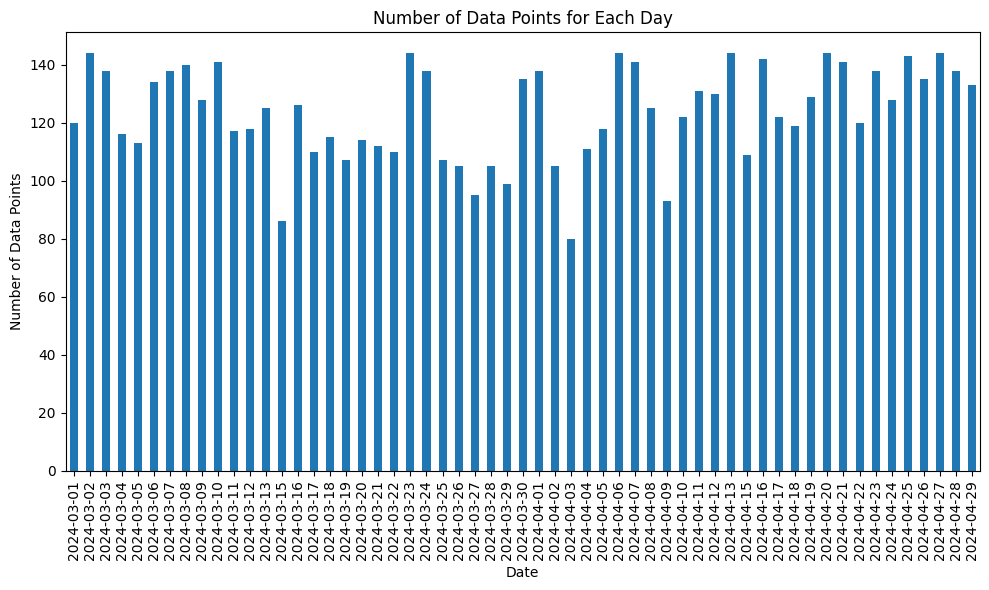

In [16]:
# Grouping by date and counting the number of data points
daily_counts = df_bikelane.groupby('date').size()

# Plotting the number of data points for each day using plt
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Number of Data Points for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

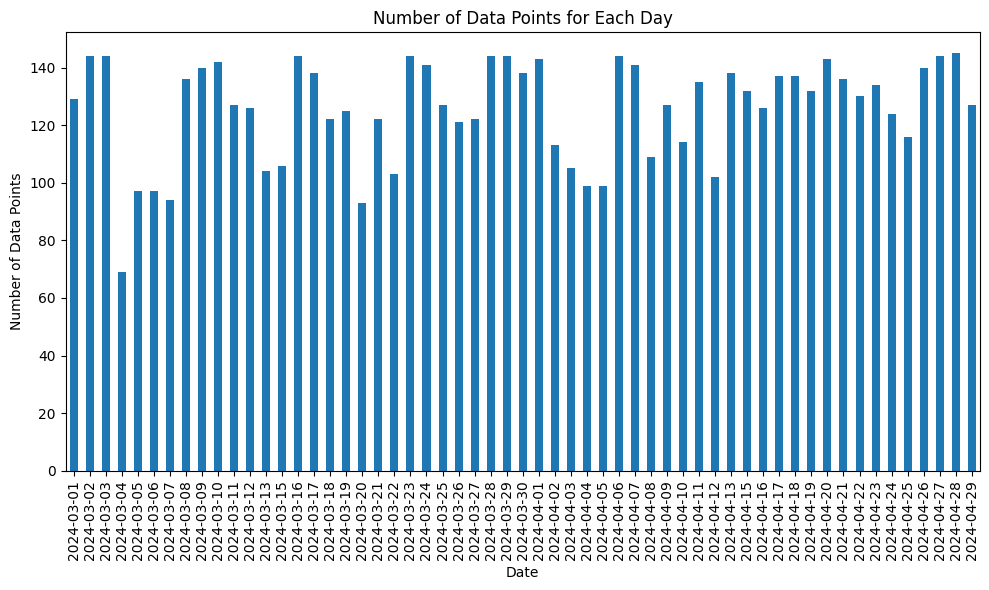

In [17]:
# Grouping by date and counting the number of data points
daily_counts = df_building.groupby('date').size()

# Plotting the number of data points for each day using plt
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Number of Data Points for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
# Convert 'package_type' to numeric codes
df_building['package_type_encoded'] = pd.Categorical(df_building['package_type']).codes
df_building['package_type_encoded'].head()

0    1
1    1
2    1
3    1
4    1
Name: package_type_encoded, dtype: int8

In [20]:
# Convert 'package_type' to numeric codes
df_bikelane['package_type_encoded'] = pd.Categorical(df_bikelane['package_type']).codes
df_bikelane['package_type_encoded'].head()

0    1
1    1
2    1
3    1
4    1
Name: package_type_encoded, dtype: int8

In [23]:
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  7155 non-null   datetime64[ns]
 1   battery               7155 non-null   float64       
 2   temperature           7155 non-null   float64       
 3   x                     7155 non-null   float64       
 4   y                     7155 non-null   float64       
 5   z                     7155 non-null   float64       
 6   radar_0               7155 non-null   float64       
 7   radar_1               7155 non-null   float64       
 8   radar_2               7155 non-null   float64       
 9   radar_3               7155 non-null   float64       
 10  radar_4               7155 non-null   float64       
 11  radar_5               7155 non-null   float64       
 12  radar_6               7155 non-null   float64       
 13  radar_7           

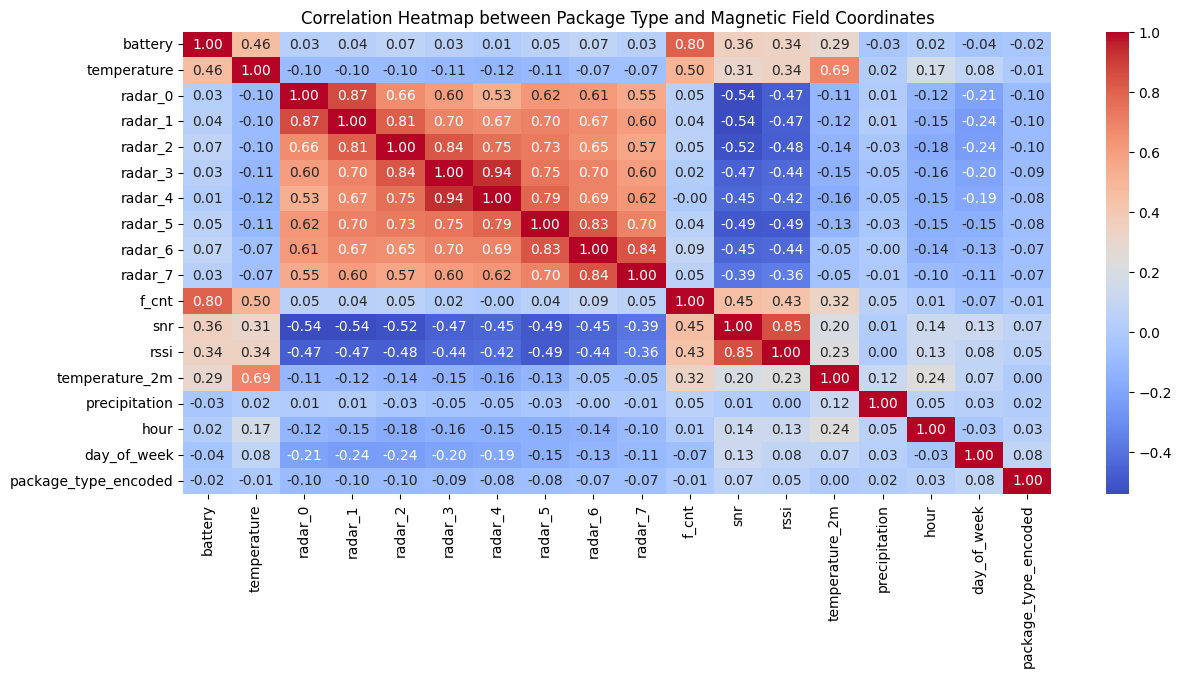

In [27]:
# Calculating correlation matrix with all the values that are not categorical
correlation_matrix = df_building[['battery', 'temperature', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'snr', 'rssi', 'temperature_2m', 'precipitation', 'hour', 'day_of_week', 'package_type_encoded']].corr()

# Plotting heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Package Type and Magnetic Field Coordinates')
plt.show()

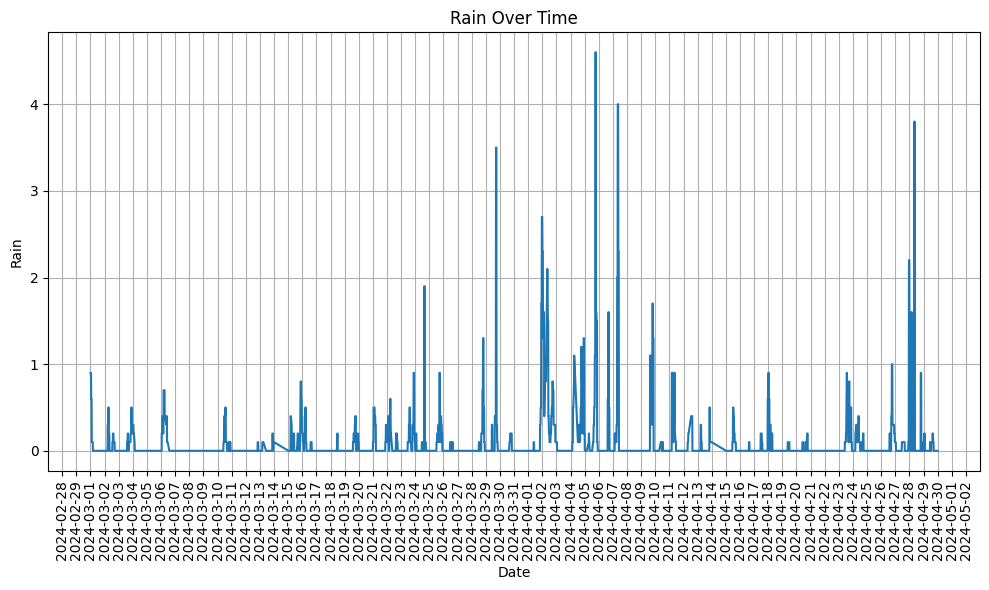

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_building['time'], df_building['precipitation'], linestyle='-')
plt.title('Rain Over Time')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.xticks(rotation=90)
plt.grid(True)

# Set x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()

/tmp/ipykernel_52897/2590097495.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_specific_time_range[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']] = normalized_data


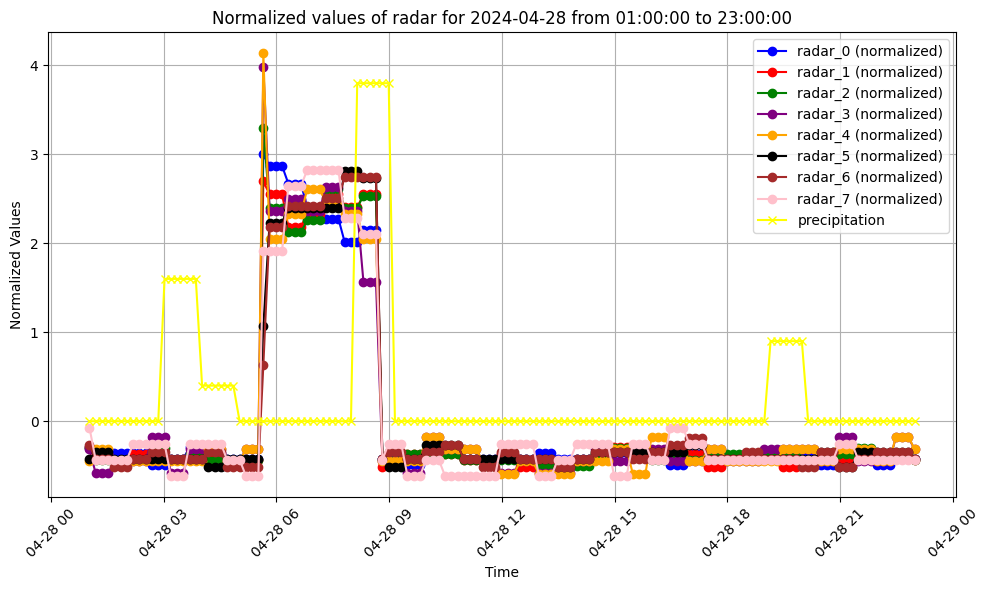

In [43]:
# Convert 'time' column to datetime if it's not already in datetime format
df_building['time'] = pd.to_datetime(df_building['time'])

# Specify the date and time range
specific_date = '2024-04-28'
start_time = '01:00:00'
end_time = '23:00:00'

# Filter the DataFrame for the specific date and time range
df_specific_time_range = df_building[(df_building['time'].dt.date == pd.to_datetime(specific_date).date()) &
                            (df_building['time'].dt.time >= pd.to_datetime(start_time).time()) &
                            (df_building['time'].dt.time <= pd.to_datetime(end_time).time())]

# Selecting the columns to be normalized
data_to_normalize = df_specific_time_range[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']]

# Applying StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

# Adding normalized data back to the DataFrame
df_specific_time_range[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']] = normalized_data

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_0'], label='radar_0 (normalized)', color='blue', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_1'], label='radar_1 (normalized)', color='red', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_2'], label='radar_2 (normalized)', color='green', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_3'], label='radar_3 (normalized)', color='purple', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_4'], label='radar_4 (normalized)', color='orange', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_5'], label='radar_5 (normalized)', color='black', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_6'], label='radar_6 (normalized)', color='brown', marker='o', linestyle='-')
plt.plot(df_specific_time_range['time'], df_specific_time_range['radar_7'], label='radar_7 (normalized)', color='pink', marker='o', linestyle='-')

#plotting rain
plt.plot(df_specific_time_range['time'], df_specific_time_range['precipitation'], label='precipitation', color='yellow', marker='x', linestyle='-')

plt.title(f'Normalized values of radar for {specific_date} from {start_time} to {end_time}')
plt.xlabel('Time')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
